## ΤΕΙ Ηπείρου - Τμήμα Μηχανικών Πληροφορικής ΤΕ 
### Παραδείγματα από το μάθημα (12/10/2016) Μαθηματικά για μηχανικούς  

---

### Επίλυση συστημάτων γραμμικών εξισώσεων με τις βιβλιοθήκες της python

#### Επίλυση συστήματος εξισώσεων 3x3 (3 εξισώσεις με 3 αγνώστους) με τη βιβλιοθήκη <http://www.numpy.org/>
$$x+2y+3z=1$$
$$y+4z=2$$
$$5x+6y=6$$

In [1]:
import numpy as np
a = np.array([[1,2,3], [0,1,4], [5,6,0]])
b = np.array([1,2,6])
x = np.linalg.solve(a,b)
print(x[0], x[1], x[2])

42.0 -34.0 9.0


#### Επίλυση συστήματος εξισώσεων 3x4 (3 εξισώσεις με 4 αγνώστους)  με τη συνάρτηση solve_linear_system του sympy

$$x+2y+3z=1$$
$$y+4z=2$$
$$5x+6y=w$$

In [2]:
from sympy import *
init_printing()
x, y, z, w = symbols('x, y, z, w')
A = Matrix([[1, 2, 3, 1], [0, 1, 4, 2], [5,6,0,w]])
results = solve_linear_system(A, x, y, z, w)
print('x={0} \ny={1} \nz={2}'.format(results[x],results[y],results[z]))

x=5*w + 12 
y=-4*w - 10 
z=w + 3


#### Επίλυση συστήματος εξισώσεων 3x4 (3 εξισώσεις με 4 αγνώστους)  με τη συνάρτηση solve του sympy και ορισμό εξισώσεων με  Eq

$$x+2y+3z=1$$
$$y+4z=2$$
$$5x+6y=w$$

In [3]:
x, y, z, w = symbols('x, y, z, w')
solve([Eq(x + 2*y +3*z, 1), Eq(y + 4*z, 2), Eq(5*x+6*y, w) ], [x, y, z, w])

### Ορίζουσες πινάκων διάστασης μεγαλύτερης του 2x2

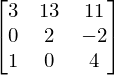

In [5]:
from IPython.display import display
A=Matrix([[3,13,11],[0,2,-2],[1,0,4]])
display(A)
display(A.det())

#### Ορίζουσες ειδικών περιπτώσεων πινάκων

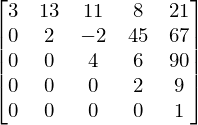

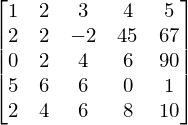

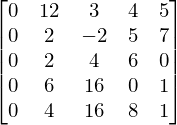

In [6]:
# άνω τριγωνικός (γινόμενο στοιχείων διαγωνίου)
A=Matrix([[3,13,11,8,21],[0,2,-2,45,67],[0,0,4,6,90],[0,0,0,2,9],[0,0,0,0,1]])
display(A)
display(A.det())
# ανάλογες στήλες ή γραμμές (1η και 5η γραμμή)
B=Matrix([[1,2,3,4,5],[2,2,-2,45,67],[0,2,4,6,90],[5,6,6,0,1],[2,4,6,8,10]])
display(B)
display(B.det())
# μηδενική στήλη ή γραμμή (1η στήλη)
C=Matrix([[0,12,3,4,5],[0,2,-2,5,7],[0,2,4,6,0],[0,6,16,0,1],[0,4,16,8,1]])
display(C)
display(C.det())

### Αντιστροφή πίνακα με χρήση του συμπληρωματικού (προσαρτημένου) πίνακα

In [8]:
from IPython.display import Latex 
A = Matrix([[1,2,3],[0,4,5],[1,0,6]])
B = A.adjugate().transpose()
C = A.adjugate()
D = 1 / det(A) * A.adjugate()
E = A.inv()
display(Latex('$A=%s$' % latex(A)))
display(Latex('Πίνακας αλγεβρικών συμπληρωμάτων (cofactor matrix) $%s$' % latex(B)))
display(Latex('Συμπληρωματικός πίνακας (adjugate) $%s$' % latex(C)))
display(Latex('|A|=%s' % det(A)))
display(Latex('$A^{-1}=%s$' % latex(D)))
display(Latex('$A^{-1}=%s$' % latex(E))) 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Επίλυση συστήματος εξισώσεων 3x3 με τη χρήση αντίστροφου πίνακα
$$x+2y+3z=1$$
$$y+4z=2$$
$$5x+6y=6$$

In [9]:
A=Matrix([[1,2,3],[0,1,4],[5,6,0]])
B=Matrix([1,2,6])
X=A.inv()*B
display(Latex('$A=%s$' % latex(A)))
display(Latex('$B=%s$' % latex(B)))
display(Latex('$A^{-1}=%s$' % latex(A.inv())))
display(Latex('$X=%s$' % latex(X)))
if A*X==B:
    print('Επιβεβαίωση AX=B')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Επιβεβαίωση AX=B


### Επίλυση συστήματος εξισώσεων 3x3 με τη μέθοδο του Cramer
$$x+2y+3z=1$$
$$y+4z=2$$
$$5x+6y=6$$

In [10]:
A=Matrix([[1,2,3],[0,1,4],[5,6,0]])
B=Matrix([1,2,6])
Dx=A[:,:] # αντιγραφή του πίνακα Α στο Dx
Dx.col_op(0,lambda v,i:B[i])
Dy=A[:,:]
Dy.col_op(1,lambda v,i:B[i])
Dz=A[:,:]
Dz.col_op(2,lambda v,i:B[i])
x = Dx.det()/A.det()
y = Dy.det()/A.det()
z = Dz.det()/A.det()
display(Latex('$A=%s$ |A|=%.1f' % (latex(A), A.det())))
display(Latex('$B=%s$' % latex(B))) 
display(Latex('$D_x=%s$ |Dx|=%.1f' % (latex(Dx), Dx.det())))
display(Latex('$D_y=%s$ |Dy|=%.1f' % (latex(Dy), Dy.det())))
display(Latex('$D_z=%s$ |Dz|=%.1f' % (latex(Dz), Dz.det())))
display(Latex('Λύση $x=%s, y=%s, z=%s$' % (x,y,z)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>